In [ ]:
#!pip install pymysql
!pip install mysql-connector 

#mysql-connector - standardized driver for Python platform. 
#It enables python programs to access MySQL databases.

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np

In [ ]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_user_sql',
                                  password='37z49REb$nK@nlpV!vJ')

In [ ]:
## Check the number of databases available on the server
cursor=connection.cursor() # helps in executing the statements 
cursor.execute('show databases')
for i in cursor:
    print(i)

In [ ]:
## connecting the database  (configure to initiate the connection to mysql)
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_user_sql',
                                  password='37z49REb$nK@nlpV!vJ',
                                  database='datamites_sql')

In [ ]:
# view tables present in datamites_sql db

db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

A query is a question, regularly communicated formally. A database query can be either a select question or an action query. A select query is an information recovery query, while an activity query requests 
extra tasks on the information, for example, addition, refreshing or deletion.

In [ ]:
# The SELECT statement is used to select data from a database.
# Select * will select all the fields (all rows and columns) available in the table.

query = "select * from dept"  # SQL statement to select all fields in 'dept' table.
output = pd.read_sql(query,connection) 
print(output.shape)
output

In [ ]:
#query = "select * from dept"  # SQL statement to select all fields in 'dept' table.
ou = pd.read_sql("select * from dept",connection) 
print(ou.shape)
ou

In [ ]:
# Task:-get details of products table
op = pd.read_sql("select * from emp", connection)
op

In [ ]:
#SELECT DISTINCT clause to retrieve the only distinct/unique values in a specified list of columns.
query = "SELECT DISTINCT job FROM emp"
output = pd.read_sql(query,connection)
output


In [ ]:
query = "select * from products"
em = pd.read_sql(query,connection)
print(em.shape)
em

In [ ]:
# check how many unique values are the for a specified column (job) from 'emp' table.

query = "SELECT count(DISTINCT job) FROM emp"
output = pd.read_sql(query,connection)
output

In [ ]:
query  =  "select DISTINCT product_id FROM orders"  
data = pd.read_sql(query,connection)
print(data.shape)
data

# SQL Where Condition for filtering

WHERE Clause in MySQL is a keyword used to specify the exact criteria of data or rows. It is used to filter rows / records.

In [ ]:
query = "select * from products where category='Furniture'"
products = pd.read_sql(query,connection)
print(products.shape)
products

In [ ]:
# retrieve data from 'emp' table  condition

query = "select * from emp where job='MANAGER'"
products = pd.read_sql(query,connection)
print(products.shape)
products

In [ ]:
query = "select * from products where category!='Furniture'"
products = pd.read_sql(query,connection)
print(products.shape)
products

# SQL Where Condition and logical statement

AND --> Returns the records which satisfies both the given expressions <br>
OR --> Returns the records which satisfies either the given expressions

In [ ]:
query = "select * from products where category='Furniture' or category='Technology'"
products = pd.read_sql(query,connection)
print(products.shape)
products

In [ ]:
#except office supplies all the records will be retrieved.

In [ ]:
query = "select * from products where category='Furniture' and category='Technology'"
products = pd.read_sql(query,connection)
print(products.shape)
products

In [ ]:
# we dont have any records which has category as furniture AND technology. 
# So no records are returned.

The **GROUP BY** statement groups rows that have the same values into summary rows.

The GROUP BY statement is often used with aggregate functions (COUNT(), MAX(), MIN(), SUM(), AVG()) 
to group the result-set by one or more columns.

The GROUP BY clause divides the result set into groups of values and the aggregate function returns a single value for each group.

In [ ]:
#
query= "select count(sub_category), category from  products  group by category"
data = pd.read_sql(query,connection)
data  

In [ ]:
query = "select * from products"
data = pd.read_sql(query,connection)
data 

In [ ]:
#Retrieve all data from products where category is Office Supplies and sub-category is Binders

query = "select * from products where category='Office Supplies' and sub_category='Binders'"
products = pd.read_sql(query,connection)
print(products.shape)
products

In [ ]:
query = "select * from products where category='Office Supplies' or sub_category='Binders'"
products = pd.read_sql(query,connection)
print(products.shape)
products

# SQL order by clause

The ORDER BY command is used to sort the result set in **ascending** or **descending order**. it will be in ascending order by default. To sort the records in descending order, use the DESC keyword.

In [ ]:
query = "SELECT * FROM emp order by sal"
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT * FROM emp order by sal desc"
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT * FROM emp order by sal,deptno"
output = pd.read_sql(query,connection)
output

# SQL NULL Values

In [ ]:
# get records where comm has null values in emp table
query = "SELECT * FROM emp where comm is null order by ename"
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT * FROM emp where comm is not null "
output = pd.read_sql(query,connection)
output

# SQL Aggregation

In [ ]:
# An SQL aggregate function calculates on a set of values and returns a single value. 
# For eg, the average function ( AVG) takes a list of values and returns the average.
# SQL aggregate functions including AVG(), COUNT(), MIN(), MAX(), and SUM().

In [ ]:
query = "SELECT min(sal) FROM emp where comm is not null "
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT max(sal) FROM emp"
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT avg(sal) FROM emp where comm is not null "
output = pd.read_sql(query,connection)
output

# SQL Like operator

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

In [ ]:
WHERE CustomerName LIKE 'a%'	Finds any values that start with "a"
WHERE CustomerName LIKE '%a'	Finds any values that end with "a"
WHERE CustomerName LIKE '%or%'	Finds any values that have "or" in any position
WHERE CustomerName LIKE '_r%'	Finds any values that have "r" in the second position
WHERE CustomerName LIKE 'a_%'	Finds any values that start with "a" and are at least 2 characters in length
WHERE CustomerName LIKE 'a__%'	Finds any values that start with "a" and are at least 3 characters in length
WHERE ContactName LIKE 'a%o'	Finds any values that start with "a" and ends with "o"

In [ ]:
query = "SELECT  * FROM emp where ename like 'k%n' "
output = pd.read_sql(query,connection)
output

# SQL IN operator

The IN operator allows you to specify multiple values or sub-query in a WHERE clause.
The IN operator is a shorthand for multiple OR conditions.

In [ ]:
query = "SELECT  * FROM dept"
output = pd.read_sql(query,connection)
output

In [ ]:
query = "SELECT  * FROM dept where dname in ('Sales','Research')"
output = pd.read_sql(query,connection)
output


# SQL Between operator

The BETWEEN operator selects values within a given range. The values can be numbers, text, or dates.
The BETWEEN operator is inclusive: begin and end values are included. 

In [ ]:
query = "SELECT  * FROM emp where sal between 800.0 and 1600.0 "
output = pd.read_sql(query,connection)
output

# SQL Joins
* (INNER) JOIN: Returns records that have matching values in both tables.

* LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table.

* RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table

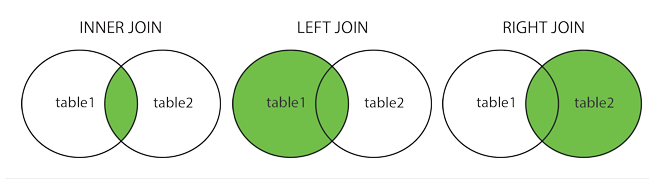

In [ ]:
query = "select * from products " # SQL statement
output = pd.read_sql(query,connection)
print(output.shape)
output

In [ ]:
query = "select * from customers " # SQL statement
output = pd.read_sql(query,connection)
print(output.shape)
output

In [ ]:
query = "select * from orders " # SQL statement
output = pd.read_sql(query,connection)
print(output.shape)
output

## SQL Left Join
also called as Left Outer Join
* INNER JOIN - Matched rows from two tables

* LEFT OUTER join includes unmatched rows from the left table + matched rows, while RIGHT OUTER join includes unmatched rows from the right side of the table + matched rows.

* The result of LEFT OUTER join can be seen as INNER JOIN + unmatched rows of left table while the result of the RIGHT OUTER join is equal to INNER JOIN + unmatched rows from the right side table.


In [ ]:
query = "select * from orders left join customers on orders.customer_id=customers.customer_id"
data = pd.read_sql(query,connection)
print(data.shape)
data

## SQL Right Join
Also called as Right outer join

In [ ]:

query = "select * from orders  right join customers on orders.customer_id=customers.customer_id"
data = pd.read_sql(query,connection)
print(data.shape)
data

In [ ]:
# fechting only customers details who have orders
query = "select * from customers  right join orders on orders.customer_id=customers.customer_id"
data = pd.read_sql(query,connection)
print(data.shape)
data

## SQL Inner Join
This is default

In [ ]:
# fechting only customers details who have orders
query = "select * from customers  inner join orders on orders.customer_id=customers.customer_id"
data = pd.read_sql(query,connection)
print(data.shape)
data

#  Join multiple tables

In [ ]:
# fechting only customers details who have orders
query = "select * from orders  \
left join customers on orders.customer_id=customers.customer_id \
right join products  on orders.product_id = products.product_id"
data = pd.read_sql(query,connection)
print(data.shape)
data

In [ ]:
type(data)

## Quick Assessment

In [ ]:
query = "select customer_id,state from customers where state='California' " 
customers = pd.read_sql(query,connection)
print(customers.shape)
customers

In [ ]:
query = "select * from orders where customer_id in (select customer_id from customers where state='California' )" # SQL statement
orders = pd.read_sql(query,connection)
print(orders.shape)
orders

In [ ]:
query = "select order_id,order_date,orders.customer_id,orders.product_id,sales,quantity from orders  \
inner join customers on orders.customer_id=customers.customer_id \
inner join products  on orders.product_id = products.product_id where  products.category='Furniture' and customers.state='California' "  
data = pd.read_sql(query,connection)
print(data.shape)
data

# Saving database tables in your system

In [ ]:
query = "select * from products " # SQL statement
products = pd.read_sql(query,connection)
print(products.shape)

In [ ]:
products.to_csv('Products.csv')